### Compilation of workings used from old exam sets
Fall 2019 <br>
Spring 2020<br>
Fall 2020<br>
Spring 2021<br>
Fall 2021<br>
<br>
... and other small exercises 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Comparing similarity of partitions

In [2]:
def compute_similarity(Z,Q):
    """
    Input: labels of clusters in set Z and Q, 
    Output: Jaccard similarity and Rand index.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    Q = list(map(int,Q.split(" ")))
    Z = list(map(int,Z.split(" ")))

    print(f'Q: {Q}')
    print(f'Z: {Z}\n')

    _,n_Q = np.unique(Q, return_counts=True)
    _,n_Z = np.unique(Z, return_counts=True)
    N = len(Q)
    q_clusters = len(n_Q)
    z_clusters = len(n_Z)
    n = np.zeros((z_clusters,q_clusters),dtype='int32')

    for i in range(N):
        Q_idx = Q[i]-1
        Z_idx = Z[i]-1
        if Q[i]==Z[i]: # same cluster
            n[Q_idx,Q_idx] += 1
        else:          # diff cluster
            n[Z_idx,Q_idx] += 1

    S = 0
    for i in range(z_clusters):
        for j in range(q_clusters):
            S += n[i,j]*(n[i,j]-1)/2

    sum_term_z = 0
    for i in range(z_clusters):
        sum_term_z += n_Z[i]*(n_Z[i]-1)/2

    sum_term_q = 0
    for i in range(q_clusters):
        sum_term_q += n_Q[i]*(n_Q[i]-1)/2

    D = N*(N-1)/2 - sum_term_q - sum_term_z + S

    jaccard = S/(0.5*N*(N-1)-D)
    rand = (S+D)/(0.5*N*(N-1))

    print(f'n: \n{n}')
    print(f'n_Q: {n_Q}')
    print(f'n_Z: {n_Z}\n')
    print(f'S: {S}')
    print(f'D: {D}')
    print(f'jaccard similarity: {jaccard:.4f}')
    print(f'rand index: {rand:.4f}')

In [3]:
# Lecture 10, slide 68
Z = '1 1 1 1 2 2 3 3 3'
Q = '4 4 1 1 2 2 2 3 3'
compute_similarity(Z,Q)

# Lecture 10, quiz 4
# Q = '1 1 3 1 1 1 1 3 3 2'
# Z = '1 1 2 2 2 3 3 3 3 3'
# compute_similarity(Z,Q)

Q: [4, 4, 1, 1, 2, 2, 2, 3, 3]
Z: [1, 1, 1, 1, 2, 2, 3, 3, 3]

n: 
[[2 0 0 2]
 [0 2 0 0]
 [0 1 2 0]]
n_Q: [2 3 2 2]
n_Z: [4 2 3]

S: 4.0
D: 24.0
jaccard similarity: 0.3333
rand index: 0.7778


## toolbox_02450 `clusterval`

This function was copied from the toolbox

In [4]:
def clusterval(y, clusterid):
    '''
    CLUSTERVAL Estimate cluster validity using Entropy, Purity, Rand Statistic,
    and Jaccard coefficient.
    
    Usage:
      Entropy, Purity, Rand, Jaccard = clusterval(y, clusterid);
    
    Input:
       y         N-by-1 vector of class labels 
       clusterid N-by-1 vector of cluster indices
    
    Output:
      Entropy    Entropy measure.
      Purity     Purity measure.
      Rand       Rand index.
      Jaccard    Jaccard coefficient.
    '''
    import sklearn.metrics.cluster as cluster_metrics
    
    NMI = cluster_metrics.normalized_mutual_info_score(y,clusterid)
    
    #y = np.asarray(y).ravel(); clusterid = np.asarray(clusterid).ravel()
    C = np.unique(y).size; K = np.unique(clusterid).size; N = y.shape[0]
    EPS = 2.22e-16
    
    p_ij = np.zeros((K,C))          # probability that member of i'th cluster belongs to j'th class
    m_i = np.zeros((K,1))           # total number of objects in i'th cluster
    for k in range(K):
        m_i[k] = (clusterid==k).sum()
        yk = y[clusterid==k]
        for c in range(C):
            m_ij = (yk==c).sum()    # number of objects of j'th class in i'th cluster
            p_ij[k,c] = m_ij.astype(float)/m_i[k]
    entropy = ( (1-(p_ij*np.log2(p_ij+EPS)).sum(axis=1))*m_i.T ).sum() / (N*K) 
    purity = ( p_ij.max(axis=1) ).sum() / K

    f00=0; f01=0; f10=0; f11=0
    for i in range(N):
        for j in range(i):
            if y[i]!=y[j] and clusterid[i]!=clusterid[j]: f00 += 1;     # different class, different cluster    
            elif y[i]==y[j] and clusterid[i]==clusterid[j]: f11 += 1;   # same class, same cluster
            elif y[i]==y[j] and clusterid[i]!=clusterid[j]: f10 += 1;   # same class, different cluster    
            else: f01 +=1;                                              # different class, same cluster
    rand = float(f00+f11)/(f00+f01+f10+f11)
    jaccard = float(f11)/(f01+f10+f11)

    return rand, jaccard, NMI

## Gaussian Kernel Density Estimator

In [5]:
## Exercise 11, Question 1
dist = [5.11,4.79,4.9,4.74,2.96,5.16,2.88]

N = len(dist)
exp = np.array([np.exp(-0.5*d**2) for d in dist])
density = 1/(N*(2*np.pi)**3.5)*exp.sum()
print(density)

6.515389602106574e-06


# Fall 2021

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
## Q8
K = 3
density = K/(24.2+38.5+37.8)
density

0.029850746268656716

In [9]:
## Q9 kde, kernel density estimation
l = 20
np.exp(-24.2**2/(2*l**2))+np.exp(-39.4**2/(2*l**2))

0.6245613861283321

In [10]:
## Q11, cosine similarity
f11 = 1
f11/(np.sqrt(2)*np.sqrt(3))

0.40824829046386296

In [11]:
## Q12, purity gain, gini impurity measure
Ir = 1 - ((2/11)**2 + (5/11)**2 + (4/11)**2)
Iv1 = 1 - ((2/6)**2 + (4/6)**2)
Iv2 = 1 - ((1/5)**2 + (4/5)**2)

n1 = 6/11
n2 = 5/11

pg = Ir - n1*Iv1 - n2*Iv2
pg

0.24022038567493123

In [12]:
print(136/1815)
print(436/1815)
print(3/11)
print(1379/1815)

0.07493112947658402
0.24022038567493112
0.2727272727272727
0.7597796143250689


In [13]:
## Q15, naive bayes classifier
mu11 = (38+26.8)/2
mu12 = (15.1+12.8)/2
var = 400
x1 = 32
x2 = 14

p1 = 1/np.sqrt((2*np.pi*var))*np.exp(-(x1-mu11)**2/(2*var))
p2 = 1/np.sqrt((2*np.pi*var))*np.exp(-(x2-mu12)**2/(2*var))
# p1 = norm.pdf(x1,mu11,np.sqrt(var))
# p2 = norm.pdf(x2,mu12,np.sqrt(var))

pC1 = 2/11

nb = p1*p2*pC1/0.00010141
nb

0.7132281110308527

In [14]:
## Q17, ANN, parameters to train
M = 8
C = 9
N = 50
(M+1)*N + N*C + C

## OR
# hidden_weights = (M+1)*N
# class_weights = (N+1)*C
# hidden_weights + class_weights

909

In [15]:
## Q19, adaboost
acc = 3/4
e = 1-acc
alpha = 0.5*np.log((1-e)/e)     # natural log
N = 572
w1 = 1/N

w2_correct = np.exp(-alpha)/(acc*np.exp(-alpha)+e*np.exp(alpha))
w2 = w1*w2_correct
w2_correct

0.6666666666666666

In [16]:
## Q21, linear regression, feature transformation
x = np.array([1,2,3,4])
phi = np.zeros((4,2))

for i in range(x.shape[0]):
    phi[i,0] = np.cos(np.pi/2*x[i])
    phi[i,1] = np.sin(np.pi/2*x[i])
print(phi)

X = np.array([[0,1],
              [-1,0],
              [0,-1],
              [1,0]])
y = np.array([6,2,3,4])

temp = np.linalg.inv(X.T@X)
print(f'w: {temp @ X.T @ y}')

[[ 6.1232340e-17  1.0000000e+00]
 [-1.0000000e+00  1.2246468e-16]
 [-1.8369702e-16 -1.0000000e+00]
 [ 1.0000000e+00 -2.4492936e-16]]
w: [1.  1.5]


In [17]:
## Q22, ridge regression
x = np.array([1,2,3,4])
mean = x.mean()
std = x.std(ddof=1)    # IMPT!! ddof = 1
# std = np.sqrt(1/(N-1) * np.sum(np.power(xi-mu,2)))  
x = (x-mean)/std

y = np.array([6,2,3,4])
E = 8
w = np.array([15/4, -np.sqrt(3/20)])

temp =  y - w[0]*1 - x*w[1]
l = (E - temp@temp.T)/w[1]**2
l

2.0000000000000044

In [18]:
# Equivalent expressions for ||x||^2
A = y - w[0]*1 - x*w[1]
print(A@A.T)

A = y - w[0]*1 - x*w[1]
print(np.linalg.norm(A)**2)

7.699999999999999
7.699999999999998


In [19]:
## Q22 Rolando
xi= np.array([1,2,3,4])
N = np.size(xi)
mu = np.mean(xi)
# s = np.sqrt(1/(N-1) * np.sum(np.power(xi-mu,2))) 
s = np.std(xi, ddof = 1)
xhat = (xi - mu) / s

yi= np.reshape(np.array([6,2,3,4]), (-1,1))
xi= np.reshape(xhat, (-1,1))

w = -(np.sqrt(3/20))
w0= 15/4
E=8

dd = yi - w0 - xi*w
lp = E - np.dot(dd.T,dd)
lp/np.power(w,2)

array([[2.]])

In [20]:
## Q23, feature selection, number of models
# disregarding K-fold CV initially
n_forward = 1+8+7+6+5+4+3+2
n_back = 1+8+7+6

K = 5
n_difference = K*(n_forward-n_back)
n_difference

70

In [21]:
## Q24, inverse cdf of student's t-distribution
n = 7
z = np.array([1,3,3,1,2,3,1])

v = n - 1
mu = z.mean()

temp = (z-2).T@(z-2)
var = 1/(n*(n-1))*temp.sum()
std = np.sqrt(var)

print(v,mu,std)
print(np.sqrt(1/7))

6 2.0 0.3779644730092272
0.3779644730092272


In [22]:
## Q25, cross validation, CV, time budget
K = [7,8,9,10]

t0 = 800*np.log2(800) + 200
L = 3
for k in K:
    ni = 800*(k-1)/k    # size of training dataset 
    mi = 800/k          # size of validation dataset
    t1 = L*k*(ni*np.log2(ni)+mi)
    t = t0 + t1
    print(f'K: {k}, t:{t:.0f}')

K: 7, t:145984
K: 8, t:169095
K: 9, t:192215
K: 10, t:215339


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]
n_positive: 5, n_negative: 4


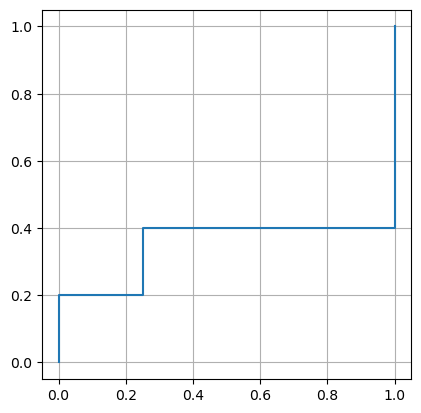

In [23]:
## Q27
# y_hat values are estimated from the predictions. 
# More importantly is the sequence of the observations 
# and their corresponding classes

import numpy as np

# Prediction C
y_hat = np.linspace(0,0.8,9)
# y_hat = [0,0.05,0.1,0.15,0.4,0.5,0.55,0.7,0.8]   
y_true = [1,1,1,0,0,0,1,0,1]

# # Prediction A
# y_hat = [0,0.08,0.1,0.15,0.4,0.5,0.55,0.75,0.8] 
# y_true = [0,1,1,0,0,1,1,1,0]

# # Prediction B
# y_hat = [0,0.05,0.1,0.15,0.4,0.5,0.55,0.7,0.8] 
# y_true = [0,1,1,1,0,1,0,1,0]

# # Prediction D
# n = 9
# y_hat = [0,0.05,0.1,0.15,0.4,] 
# y_true = [1,0,1,1,0,1,1,0,0]

print(y_hat)
draw_ROC_curve(y_hat,y_true)

# Spring 2021

In [24]:
import numpy as np

## Comparing similarity of partitions

In [25]:
x = np.array([15.5, 59.2, 1.4, 1438, 5.3])
mu = np.array([12.9, 58.2, 1.7, 1436.8, 4.1])
x.shape
x_til = x-mu
x_til

array([ 2.6,  1. , -0.3,  1.2,  1.2])

In [26]:
V = np.array([[0.11, -0.58, 0.3, -0.17, -0.48],
              [-0.58, -0.31, 0.01, -0.5, 0.56],
              [0.49, 0.08, -0.49, -0.72 ,-0.07],
              [0.6, -0.36, 0.04, 0.27 ,0.66],
              [-0.23, -0.36, -0.82 ,0.37 ,-0.09]])
print(x_til.T@V)
print(np.matmul(x_til.T,V))

[ 3.000e-03 -2.706e+00  1.000e-03  4.200e-02  1.700e-02]
[ 3.000e-03 -2.706e+00  1.000e-03  4.200e-02  1.700e-02]


## Q2

In [27]:
x.T@V

array([ 829.636, -546.818,   57.73 ,  356.978,  974.217])

In [28]:
v1 = np.array([0.11, -0.58, 0.49, 0.6, -0.23])

In [29]:
V.T@v1

array([ 1.0015e+00,  2.2000e-02, -3.0000e-04, -4.6000e-03,  4.8000e-03])

## Q4

In [30]:
b_a = np.array([0, -3.2, 0, 0, 0]).T
b_b = np.array([0, 1.2, 0, 0, 0]).T
b_c = np.array([0, 1.5, 0, 0, 0]).T
b_d = np.array([0, -1.6, 0, 0, 0]).T

print(V@b_a + mu)
print(V@b_b + mu)
print(V@b_c + mu)
print(V@b_d + mu)

[  14.756   59.192    1.444 1437.952    5.252]
[  12.204   57.828    1.796 1436.368    3.668]
[  12.03    57.735    1.82  1436.26     3.56 ]
[  13.828   58.696    1.572 1437.376    4.676]


## Q5

In [31]:
np.sqrt(7)

2.6457513110645907

In [32]:
-7/(np.sqrt(415)*np.sqrt(1))

-0.3436164855716712

## Q7

In [33]:
K = 2
density = K/(5.4+5.2)   # o3
density_n1 = K/(4.0+3.5)   # o2
density_n2 = K/(4.0+3.3)   # o4
print(f'density_3: {density}')

ard = density*K/(density_n1 + density_n2)
ard

density_3: 0.18867924528301885


0.6979857215706273

## Q11

In [34]:
n_high_hum = (3285-1327)+(2190-1718)+(3285-2344)
n_high_hum_high_dem = 3285-2344
prob = n_high_hum_high_dem/n_high_hum
prob

0.2791456541085731

## Q12

In [35]:
max_supp = (3637)/8760
max_supp

0.4151826484018265

## Q13

In [36]:
# root node
r = [23,6,17,14,13]
r_mu = sum(r)/len(r)
Ir = [(i-r_mu)**2 for i in r]
Ir = sum(Ir)/len(r)
Ir

30.639999999999997

In [37]:
# v1 node
r = [23]
r_mu = sum(r)/len(r)
Ir = [(i-r_mu)**2 for i in r]
Ir = sum(Ir)/len(r)
Ir

0.0

In [38]:
# v2 node
r = [6,17,14,13]
r_mu = sum(r)/len(r)
Ir = [(i-r_mu)**2 for i in r]
Ir = sum(Ir)/len(r)
Ir

16.25

In [39]:
purity_gain = 30.64 - 1/5*0 - 4/5*16.25
purity_gain

17.64

In [40]:
## WRONG
Ir = 1 - (1/5)**2 + (1/5)**2 + (3/5)**2
Iv1 = 1 - (1/1)**2
Iv2 = 1 - (1/4)**2 + (3/4)**2
pg = Ir - (1/5)*Iv1 - (4/5)*Iv2
pg

0.1599999999999997

In [41]:
## WRONG
Ir = -(1/5)*np.log2(1/5)-(1/5)*np.log2(1/5)-(3/5)*np.log2(3/5)
Iv1 = -(1/1)*np.log2(1/1)
Iv2 = -(1/4)*np.log2(1/4)-(3/4)*np.log2(3/4)
pg = Ir - (1/5)*Iv1 - (4/5)*Iv2
pg

0.7219280948873624

## Q17

In [42]:
var = .5*(1-1.6)**2 + 0.36*(2-1.6)**2 + 0.14*(3-1.6)**2
var

0.512

In [43]:
x = np.array([15.5, 59.2, 1.4, 1438, 5.3])
mu = np.array([12.9, 58.2, 1.7, 1436.8, 4.1])
x.shape
x_til = x-mu
x_til


array([ 2.6,  1. , -0.3,  1.2,  1.2])

In [44]:
V = np.array([[0.11, -0.58, 0.3, -0.17, -0.48],
              [-0.58, -0.31, 0.01, -0.5, 0.56],
              [0.49, 0.08, -0.49, -0.72 ,-0.07],
              [0.6, -0.36, 0.04, 0.27 ,0.66],
              [-0.23, -0.36, -0.82 ,0.37 ,-0.09]])
print(x_til.T@V)
print(np.matmul(x_til.T,V))

[ 3.000e-03 -2.706e+00  1.000e-03  4.200e-02  1.700e-02]
[ 3.000e-03 -2.706e+00  1.000e-03  4.200e-02  1.700e-02]


## Q17

In [45]:
var = .5*(1-1.6)**2 + 0.36*(2-1.6)**2 + 0.14*(3-1.6)**2
var

0.512

# Fall 2020

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
## Q4, correlation, covariance
cov = 9852
std_x = np.sqrt(196)
std_y = np.sqrt(648025)

cor = cov/(std_x*std_y)
cor

0.8741792369121562

rho:	 [0.68616333 0.1946585  0.0922564  0.02692177]
cumsum:	 [0.68616333 0.88082182 0.97307823 1.        ]


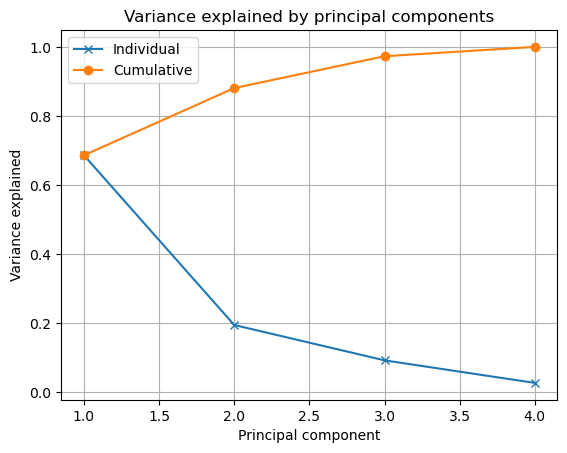

In [48]:
# S: sigma, not squared
S = np.array([30.19,16.08,11.07,5.98])

# rho: variance explained by each PC
rho = (S*S) / (S*S).sum()
print(f'rho:\t {rho}')

# cumulative sum
cumsum = np.cumsum(rho)
print(f'cumsum:\t {cumsum}')

plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [49]:
## Q7, PCA data projection
x_til = np.array([-1,-1,-1,1])
x_til = np.reshape(x_til, (-1,1))

V = np.array([[0.45,-0.6,-0.64,0.15],
              [-0.4,-0.8,0.43,-0.16],
              [0.58,-0.01,0.24,-0.78],
              [0.55,-0.08,0.59,0.58]])

pc1 = x_til.T@V[:,0]
pc2 = x_til.T@V[:,1]
pc3 = x_til.T@V[:,2]
pc4 = x_til.T@V[:,3]
print(pc1,pc2,pc3,pc4)

[-0.08] [1.33] [0.56] [1.37]


In [50]:
## Q8, rand index
n = np.array([[114,0,32],
              [0,119,0],
              [8,0,60]])
N = 333

S = 0
for i in range(3):
    for j in range(3):
        temp = 0.5*n[i,j]*(n[i,j]-1)
        S += temp

temp = 0
for i in range(3):
    temp += 0.5*n[:,i].sum()*(n[:,i].sum()-1)    # column-wise sum
    temp += 0.5*n[i,:].sum()*(n[i,:].sum()-1)    # row-wise sum
D = 0.5*N*(N-1) - temp + S

rand = (S+D)/(0.5*N*(N-1))
rand

0.8740909584283079

In [51]:
## Q11, bayes theorem
pp1 = 0.44
pp2 = 0.36
pp3 = 0.20

l1 = 0
l2 = 0.85
l3 = 0.16

prob = (l3*pp3)/(l1*pp1 + l2*pp2 + l3*pp3)
prob

0.09467455621301776

In [52]:
## Q12, density, average relative density
K = 2
density = K/(75+125)       # o2
density_n1 = K/(75+51)     # o3
density_n2 = K/(51+125)    # o10

ard = density*K/(density_n1 + density_n2)
ard

0.7343046357615894

In [53]:
## Q13, average linkage
m2 = 2
m3 = 3
pairwise_o6 = 1025+925+1375
pairwise_o7 = 1100+1000+1450

(pairwise_o6+pairwise_o7)/(m2*m3)

1145.8333333333333

In [54]:
## Q15, bayes theorem
p_male = 6/10
p_female = 4/10

numerator = (3/6)*(4/6)*(3/6)*p_male
denom = (2/4)*(4/4)*(2/4)*p_female + numerator

prob = numerator/denom
prob

0.49999999999999994

In [55]:
## Q18, purity gain, class error, classError
I_parent = 1 - 146/333
I_left = 1 - 146/(146+119)
I_right = 1 - 68/68

n1 = (146+119)/333
n2 = 68/333

pg = I_parent - n1*I_left - n2*I_right
pg

0.20420420420420415

In [56]:
print(68/333,68/265,265/333)

0.2042042042042042 0.25660377358490566 0.7957957957957958


In [57]:
## Q19, adaboost
w1 = 1/7
e = 1/7
alpha = 0.5*np.log((1-e)/e)
w_correct = w1*np.exp(-alpha)/(6*w1*np.exp(-alpha) + w1*np.exp(alpha))
w_correct

0.08333333333333331

In [58]:
## Q21, logistic regression
# w = [423.49, 48.16]
# w = [0, -46.21]
# w = [0, -27.89]
w = [418.94, -26.12]

x = 14
y = 1/(1+np.exp(-w[0]-x*w[1]))
print(y)

x = 20
y = 1/(1+np.exp(-w[0]-x*w[1]))
print(y)

1.0
1.1692110261658423e-45


In [59]:
## Q22, GMM, gaussian mixture model
from scipy.stats import norm

# norm.pdf(test_value, mean, std)
mm1 = norm.pdf(15.38, 18.347, 1.2193)
mm2 = norm.pdf(15.38, 14.997,0.986)
mm3 = norm.pdf(15.38, 18.421,1.1354)
w1 = 0.13
w2 = 0.55
w3 = 0.32

prob = mm2*w2/(mm1*w1 + mm2*w2 + mm3*w3)
prob

0.974887415657141

In [60]:
## Q23, McNemar's test, p-value
import scipy

n12 = 8+15+5
n21 = 7+11+17
p = 2*scipy.stats.binom.cdf(min([n12,n21]), n=n12+n21, p=0.5)
p

0.44996253629022254

In [61]:
## Q24, ROC curve

def draw_ROC_curve(y_hat,y_true):
    """
    Input: y_true values estimated from a 1-dimension observation,
           y_hat values based on class membership
    Output: Jaccard similarity and Rand index.
    """
    
    import matplotlib.pyplot as plt
    
    if len(y_hat)!=len(y_true):
        raise ValueError("y_hat and y_true have different array lengths")
        
    n = len(y_hat)
    n_positive = y_true.count(1)
    n_negative = y_true.count(0)
    print(f'n_positive: {n_positive}, n_negative: {n_negative}')
    
    TPR = [1]
    FPR = [1]
    for i in range(n):
        TP = 0
        FP = 0
        threshold = y_hat[i]
        for j in range(n):
            if y_hat[j] > threshold and y_true[j]==0:
                FP+=1
            if y_hat[j] > threshold and y_true[j]==1:
                TP+=1
        TPR.append(TP/n_positive)
        FPR.append(FP/n_negative)
        
    plt.plot(FPR,TPR)
    plt.grid()
    plt.axis('square')
    plt.show()

n_positive: 4, n_negative: 3


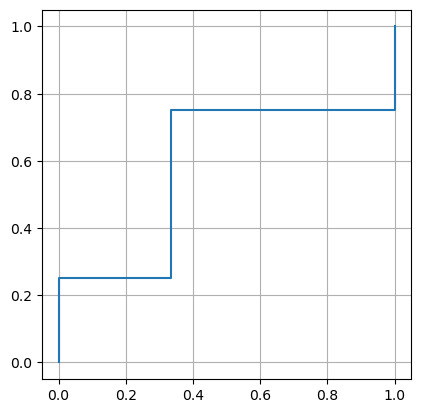

In [62]:
import numpy as np

y_hat = [0.01,0.05,0.14,0.3,0.31,0.36,0.91]   
y_true = [1,0,0,1,1,0,1]

draw_ROC_curve(y_hat,y_true)

In [63]:
## Q25, ANN, number of parameters
M = 4
N = 6
C = 3
(M+1)*N + N*C + C

51

In [64]:
## Q26, bayes theorem
num = 0.97*0.01
denom = 0.97*0.01 + 0.03*0.99
prob = num/denom
prob

0.24619289340101524

In [65]:
## Q27, cross validation, cv, leave one out
# number of times an observation is trained
# M = 4
n = 221*2*4      # 1768, from inner fold
n = n+2          # retrain on parameterisation set
n

1770

# Spring 2020

In [66]:
import numpy as np
import matplotlib.pyplot as plt

rho:	 [0.8569893  0.10485905 0.02361172 0.01175298 0.00278695]
cumsum:	 [0.8569893  0.96184835 0.98546007 0.99721305 1.        ]


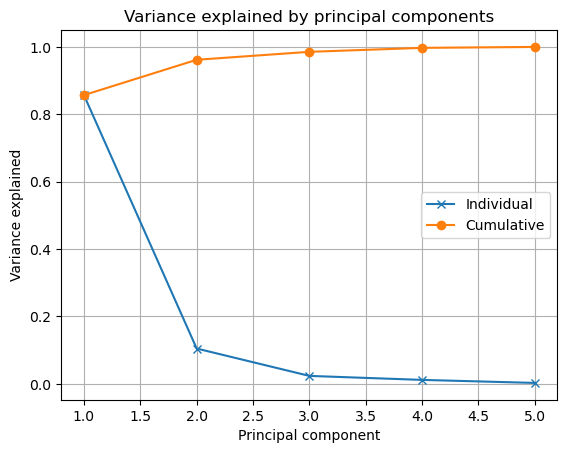

In [67]:
## Q3
# S: sigma, not squared
S = np.array([19.64,6.87,3.26,2.3,1.12])

# rho: variance explained by each PC
rho = (S*S) / (S*S).sum()
print(f'rho:\t {rho}')

# cumulative sum
cumsum = np.cumsum(rho)
print(f'cumsum:\t {cumsum}')

plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [68]:
## Q6, average relative density
K = 2
density = K/(0.9+1.0)   # o3
density_n1 = K/(1.0+1.3)   # o2
density_n2 = K/(0.9+1.3)   # o5

ard = density*K/(density_n1 + density_n2)
ard

1.183625730994152

In [69]:
## Q9, logistic regression, sigmoid
x1 = -0.06
x2 = -0.28
x3 = 0.43
x4 = -0.3
x5 = -0.36
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 1

temp = 1.41 + 0.76*x1 + 1.76*x2 - 0.32*x3 - 0.96*x4 + 6.64*x5 \
- 5.13*c1 - 2.06*c2 + 96.73*c3 + 1.03*c4 - 2.74*c5

y_hat = 1/(1+np.exp(-temp))
y_hat       # probability of being positive class

0.01616833675669645

In [70]:
## Q10, F-measure
TP = 34
FN = 11
FP = 7
TN = 39

precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*precision*recall/(precision+recall)
F1

0.7906976744186047

In [71]:
## Q11
def draw_ROC_curve(y_hat,y_true):
    """
    Input: y_true values estimated from a 1-dimension observation,
           y_hat values based on class membership
    Output: Jaccard similarity and Rand index.
    """
    
    import matplotlib.pyplot as plt
    
    if len(y_hat)!=len(y_true):
        raise ValueError("y_hat and y_true have different array lengths")
        
    n = len(y_hat)
    n_positive = y_true.count(1)
    n_negative = y_true.count(0)
    print(f'n_positive: {n_positive}, n_negative: {n_negative}')
    
    TPR = [1]
    FPR = [1]
    for i in range(n):
        TP = 0
        FP = 0
        threshold = y_hat[i]
        for j in range(n):
            if y_hat[j] > threshold and y_true[j]==0:
                FP+=1
            if y_hat[j] > threshold and y_true[j]==1:
                TP+=1
        TPR.append(TP/n_positive)
        FPR.append(FP/n_negative)
        
    plt.plot(FPR,TPR)
    plt.grid()
    plt.axis('square')
    plt.show()

n_positive: 3, n_negative: 8


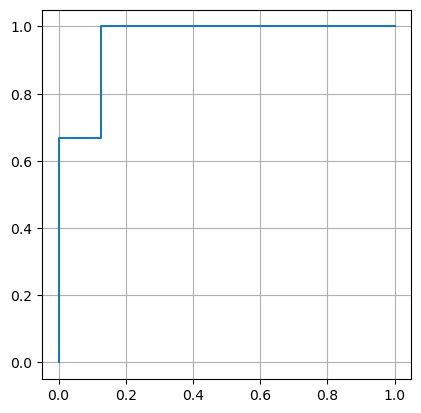

In [72]:
import numpy as np

y_hat = np.linspace(0,1,11)

# y_true = [0,0,0,0,0,0,0,0,1,1,1] # c1
# y_true = [0,0,0,0,0,0,0,1,1,0,1] # c1
# y_true = [1,1,1,1,1,1,0,1,0,1,0] # c3
y_true = [0,0,0,0,0,0,0,1,0,1,1] # c4

draw_ROC_curve(y_hat,y_true)

In [73]:
## Q13, ANN, time budget
M = 3
K1 = 4
K2 = 7
n_trained = (K2*M+1)*K1
n_test = (K2*M+1)*K1
total = n_trained*20 + n_test
total

1848

In [74]:
## Q15, bayes theorem
p_africa = 0.154
numerator =  0.286*p_africa

prob = numerator/(numerator + 0.688*(1-p_africa))
prob

0.07034748886745079

In [75]:
## Q16, robust estimation
# (WRONG, it's much simpler than this)
a = 1
num = (0+a)/(7+2*a)*(7/11)
denom = num \
        + (1+a)/(1+2*a)*(1/11) \
        + (1+a)/(2+2*a)*(2/11) \
        + (1+a)/(1+2*a)*(1/11)
prob = num/denom
prob

0.24999999999999994

In [76]:
## Q17, naive bayes classifier
p_y1 = 3/11
p_y0 = 1-p_y1

num = (1/3)*(2/3)*p_y1
denom = num + (8/8)*(1/8)*p_y0

prob = num/denom
prob

0.39999999999999997

In [77]:
print(2/9,1/3,2/5,16/25)

0.2222222222222222 0.3333333333333333 0.4 0.64


In [78]:
## Q18, decision tree, gini
I_parent = 1 - (8/11)**2 - (3/11)**2
I_left = 1 - (2/4)**2 - (2/4)**2
I_right = 1 - (6/7)**2 - (1/7)**2

w_left = 4/11
w_right = 7/11

pg = I_parent - w_left*I_left - w_right*I_right
pg

0.05903187721369535

In [79]:
## Q19, jaccard index
def compute_similarity(Z,Q):
    """
    Input: labels of clusters in set Z and Q, 
    Output: Jaccard index and Rand index.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    Q = list(map(int,Q.split(" ")))
    Z = list(map(int,Z.split(" ")))

    print(f'Q: {Q}')
    print(f'Z: {Z}\n')

    _,n_Q = np.unique(Q, return_counts=True)
    _,n_Z = np.unique(Z, return_counts=True)
    N = len(Q)
    q_clusters = len(n_Q)
    z_clusters = len(n_Z)
    n = np.zeros((z_clusters,q_clusters),dtype='int32')

    for i in range(N):
        Q_idx = Q[i]-1
        Z_idx = Z[i]-1
        if Q[i]==Z[i]: # same cluster
            n[Q_idx,Q_idx] += 1
        else:          # diff cluster
            n[Z_idx,Q_idx] += 1

    S = 0
    for i in range(z_clusters):
        for j in range(q_clusters):
            S += n[i,j]*(n[i,j]-1)/2

    sum_term_z = 0
    for i in range(z_clusters):
        sum_term_z += n_Z[i]*(n_Z[i]-1)/2

    sum_term_q = 0
    for i in range(q_clusters):
        sum_term_q += n_Q[i]*(n_Q[i]-1)/2

    D = N*(N-1)/2 - sum_term_q - sum_term_z + S

    jaccard = S/(0.5*N*(N-1)-D)
    rand = (S+D)/(0.5*N*(N-1))

    print(f'n: \n{n}')
    print(f'n_Q: {n_Q}')
    print(f'n_Z: {n_Z}\n')
    print(f'S: {S}')
    print(f'D: {D}')
    print(f'jaccard similarity: {jaccard:.4f}')
    print(f'rand index: {rand:.4f}')

In [80]:
Z = '0 0 0 0 0 0 0 0 1 1 0'
Q = '0 0 0 0 0 0 0 0 1 1 1'
compute_similarity(Z,Q)

Q: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
Z: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]

n: 
[[2 0]
 [1 8]]
n_Q: [8 3]
n_Z: [9 2]

S: 29.0
D: 16.0
jaccard similarity: 0.7436
rand index: 0.8182


In [81]:
## Q20, support
0.3*11

3.3

In [82]:
## Q24, cdf
# wrong, need to do math integration
p = 0.6*0.2 + 1*0.4 + 1.6*0.3
p

1.0

In [83]:
## Q25, p-norm, minkowski distance
import numpy as np

def distance(x, y, p):
    if p == 'inf':
        d = np.max(np.abs(x-y))
    else:
        d = np.power(np.sum(np.power(np.abs(x-y),p)) , (1/p))
    return d

x = np.array([-1.24, -0.26, -1.04])
y = np.array([-0.6, -0.86, -0.5])

d = distance(x, y, 1)
print("d: ", d)
d = distance(x, y, 4)
print("d: ", d)
d = distance(x, y, 'inf')
print("d: ", d)

d:  1.78
d:  0.7863759868045784
d:  0.64


In [84]:
## cosine similarity
x@y.T/(np.linalg.norm(x)*np.linalg.norm(y))

0.7812067103167513

In [85]:
np.sqrt(x@x.T) == np.linalg.norm(x)

True

In [86]:
## Q27, adaboost, prediction
T = 4
y1_test = [0,1,0,0]   # cross
y2_test= [0,1,1,1]    # square

e_values = [0.417, 0.243, 0.307, 0.534]
a_values = [0.5*np.log((1-e)/e) for e in e_values]
a_values

[0.16755048227584546,
 0.5681509050484501,
 0.40709112580135304,
 -0.06810510241727454]

In [87]:
y1_score = [0,0]
for i in range(T):
    if y1_test[i]==0:
        y1_score[0] += a_values[i]
    else:
        y1_score[1] += a_values[i]
        
y2_score = [0,0]
for i in range(T):
    if y2_test[i]==0:
        y2_score[0] += a_values[i]
    else:
        y2_score[1] += a_values[i]
        
print(np.argmax(y1_score))
print(np.argmax(y2_score))

1
1


# Fall 2019



In [88]:
import numpy as np
import matplotlib.pyplot as plt

rho:	 [0.3241862  0.19043184 0.16494693 0.15668653 0.13109312 0.03265537]
cumsum:	 [0.3241862  0.51461804 0.67956498 0.83625151 0.96734463 1.        ]


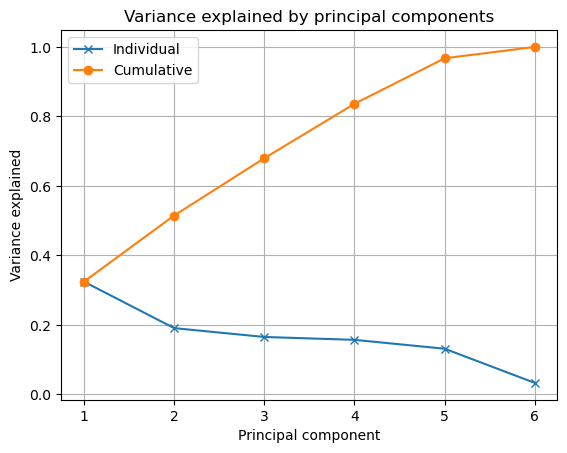

In [89]:
## Q2
# S: sigma, not squared
S = np.array([43.67,33.47,31.15,30.36,27.77,13.86])

# rho: variance explained by each PC
rho = (S*S) / (S*S).sum()
print(f'rho:\t {rho}')

# cumulative sum
cumsum = np.cumsum(rho)
print(f'cumsum:\t {cumsum}')

plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [90]:
## Q4, PCA projection
print("Start, PC1: ", -0.09*-2)
print("Start, PC2: ", 0.69*-2)
print("End, PC1: ", -0.09*2)
print("End, PC2: ", 0.69*2)


Start, PC1:  0.18
Start, PC2:  -1.38
End, PC1:  -0.18
End, PC2:  1.38


In [91]:
## Q5, correlation
cov = -29
std_x = np.sqrt(12)
std_y = np.sqrt(6104)

cor = cov/(std_x*std_y)
cor

-0.10715195825624312

In [92]:
## Q6
K = 2
density = K/(1.5+2.4)   # o5
density_n1 = K/(1.5+1.6)   # o4
density_n2 = K/(1.6+1.7)   # o6

ard = density*K/(density_n1 + density_n2)
ard

0.8197115384615385

In [93]:
## Q8 WRONG, much simpler than this
N = 1500
S = 0.5*(2+1497*1496)
D = 0.5*N*(N-1) - 0.5*(1497*1496+2) - 0.5*(1499*1498) + S

jaccard = S/(0.5*N*(N-1)-D)
jaccard

0.9973333357084518

In [94]:
## Q8, jaccard similarity
f11 = 1
f00 = 2
N = 1500

jaccard = f11/(N-f00)
jaccard

0.0006675567423230974

In [95]:
## Q14, ridge regression cost function

l = 2

y = np.array([6,7,7,9])
w0 = y.mean()
w = 0.6

x = np.array([2,5,6,7])
mean = x.mean()
std = x.std(ddof=1)    # IMPT!! ddof = 1
x = (x-mean)/std

temp = y - w0 - x*w
E = temp@temp.T + l*w**2
E

2.661555580955284

In [96]:
## Q16, mean square error, pg mse
parent = np.array([12,6,8,10,4,2])
left = np.array([12,6,8,10])
right = np.array([4,2])

I_parent = 1/len(parent)*((parent - parent.mean())**2).sum()
I_left = 1/len(left)*((left - left.mean())**2).sum()
I_right = 1/len(right)*((right - right.mean())**2).sum()

pg = I_parent - 4/6*I_left - 2/6*I_right
pg

7.999999999999999

In [97]:
## Q17, LOO, leave-one-out estimate of generalization error
loss = 12-(6+10+4)/3
squared_loss = loss**2
squared_loss

28.444444444444443

In [98]:
## Q18, McNemar test, estimated difference in accuracy
n12 = 40+31+23+30
n21 = 24+26+25+25
n = 981

E_theta = (n12-n21)/n
E_theta

0.024464831804281346

In [99]:
## Q19, Jeffreys interval, single model
m = 134+141+131+132 \
    + n21
n = 981

a = m+0.5
b = n-m+0.5
a,b

(638.5, 343.5)

In [100]:
## Q20, ANN output

import numpy as np

def sigmoid(xw):
    output = 1 / (1 + np.exp(-xw))
    return output

def reLu(xw):
    output = (xw > 0) * xw
    return output

def tanh(xw):
    output = np.tanh(xw)
    return output

w0 = 1.4
w1 = np.array([-0.5, -0.1])
w2 = np.array([0.9, 2.0])
w_list = np.array([w1, w2])
w_out = np.array([-1.0, 0.4])

# INPUT LAYER, choose a random point for comparison, add 1 in front
x = np.array([1,-2])

# HIDDEN LAYER
z = []   # output of hidden units
for weight in w_list:
    xw = x @ weight
    z.append(sigmoid(xw))

# OUTPUT LAYER
f = sigmoid(np.sum(w_out * z) + w0)
f

0.7294206955519241

In [101]:
## Q21, KDE, cross validation curve, CV curve
from scipy.stats import norm

N = 3
sigma = 2    # choose a value for comparison

kde1 = norm.pdf(1.2, 4.5, sigma)
kde2 = norm.pdf(1.2, -0.5, sigma)

prob = 1/(N-1)*(kde1+kde2)
print(prob)

n_test = 1
E = -1/n_test*np.log(prob)
E

0.09506245267374364


2.3532212068063405

In [102]:
3/7

0.42857142857142855

In [103]:
## Q24, multinomial regression model, on projected dataset
w1 = np.array([0.04,1.32,-1.48])
w2 = np.array([-0.03,0.7,-0.85])
b1 = -5.52
b2 = -4.69

b_til = np.array([1, b1, b2])
y1 = b_til @ w1
y2 = b_til @ w2

denom = 1 + np.exp(y1) + np.exp(y2)
p_y1 = np.exp(y1)/denom
p_y2 = np.exp(y2)/denom
p_y3 = 1/denom

p = [p_y1, p_y2, p_y3]
p

[0.26005815220259126, 0.38706988894897465, 0.35287195884843414]

In [105]:
## 1-dimensional K-means clustering, K means
import numpy as np
from sklearn.cluster import KMeans

X = np.array([0.4,0.5,1.1,2.2,2.6,3.0,3.6,3.7,4.9,5.0])
X = X.reshape(-1,1)

nClusters = 3
withInitialCluster = True
initial_cluster = np.array([2.4,3.3,3.5])
initial_cluster = initial_cluster.reshape(-1,1)


if withInitialCluster:
    kmeans = KMeans(n_clusters=nClusters, n_init=1, max_iter=1000, init=initial_cluster).fit(X)
else:
    kmeans = KMeans(n_clusters=nClusters, n_init=100, max_iter=1000).fit(X)

print("Cluster centers = \n{}".format(kmeans.cluster_centers_))
print("Labels = {}".format(kmeans.labels_))


Cluster centers = 
[[0.66666667]
 [2.85      ]
 [4.53333333]]
Labels = [0 0 0 1 1 1 1 2 2 2]


C:\Users\yufan\anaconda3\envs\course02450\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Dist 1:  [0.  0.4 0.6 1.7 2.1 2.7 2.9 3.1 3.2]
Dist 2:  [0.4 0.  0.2 1.3 1.7 2.3 2.5 2.7 2.8]
Dist 2:  [0.6 0.2 0.  1.1 1.5 2.1 2.3 2.5 2.6]
Second iteration
Dist 1:  [0.  0.4 0.6 1.7 2.1 2.7 2.9 3.1 3.2]
Dist 2:  [0.4 0.  0.2 1.3 1.7 2.3 2.5 2.7 2.8]
Dist 2:  [0.6 0.2 0.  1.1 1.5 2.1 2.3 2.5 2.6]


In [107]:
import numpy as np

def fromStringToArray(aString):
    return np.array([float(value) for value in aString.split()])


transactions = [
    "0 0 0 1 0 0 0 1",
    "0 0 1 0 0 1 0 1",
    "0 0 1 0 0 1 0 1",
    "0 1 0 0 0 1 0 1",
    "0 0 0 0 0 1 0 1",
    "0 0 1 0 1 1 0 1",
    "0 0 1 0 0 1 0 1",
    "1 1 0 0 0 0 1 1",
    '0 1 0 0 0 0 0 1',
    '0 1 0 0 0 1 0 1',
    '1 1 0 0 0 0 0 0'
]

items_names = "f1 f2 f3 f4 f5 f6 f7 f8"

# for support : give the indexes of concerned items
anItemSet = [1, 4]

# for confidence: give the indexes of concerned items for rule X -> Y
X = [1, 6]
Y = [3]

transactions = [ fromStringToArray(e) for e in transactions]
items_names = items_names.split(' ')

def get_all_individuel_supports():
    items_supports={}
    for i in range (len(transactions[0])):
        value = sum([t[i] for t in transactions])/len(transactions)
        items_supports[items_names[i]]=value
    return items_supports

print(get_all_individuel_supports())









def get_support(aListOfIndexes):
    support = 0
    for t in transactions:
        boolean_rep = np.product(np.array([t[i]==1 for i in aListOfIndexes]))
        if boolean_rep:
            support += 1
    support = support / len(transactions)
    return support

print("Support of {} = {}".format([items_names[i] for i in anItemSet], get_support(anItemSet)))


def get_confidence(X,Y):
    return get_support(X+Y)/get_support(X)

print("Confidence of rule '{}->{}' = {}".format([items_names[i] for i in X],[items_names[i] for i in Y],get_confidence(X,Y)))

{'f1': 0.18181818181818182, 'f2': 0.45454545454545453, 'f3': 0.36363636363636365, 'f4': 0.09090909090909091, 'f5': 0.09090909090909091, 'f6': 0.6363636363636364, 'f7': 0.09090909090909091, 'f8': 0.9090909090909091}
Support of ['f2', 'f5'] = 0.0
Confidence of rule '['f2', 'f7']->['f4']' = 0.0


## Fall 2022


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Q3, PCA projection
X = np.array([7,5,8,9,3,3,2,4,7])
X = X.reshape(3,3)
X_mu = X.mean(axis=0)    # average of each column

V = np.array([[-0.84, 0.53, 0.1],
             [0.14,0.39,-0.91],
             [0.52,0.75,0.4]])

x3 = np.array([2,4,7])
x3 = x3 - X_mu

b1 = x3 @ V[:,0]
b2 = x3 @ V[:,1]
print(b1,b2)

3.88 -1.37


rho:	 [0.93935997 0.05571822 0.00332071 0.0016011 ]
cumsum:	 [0.93935997 0.99507819 0.9983989  1.        ]
0.9442817831455644


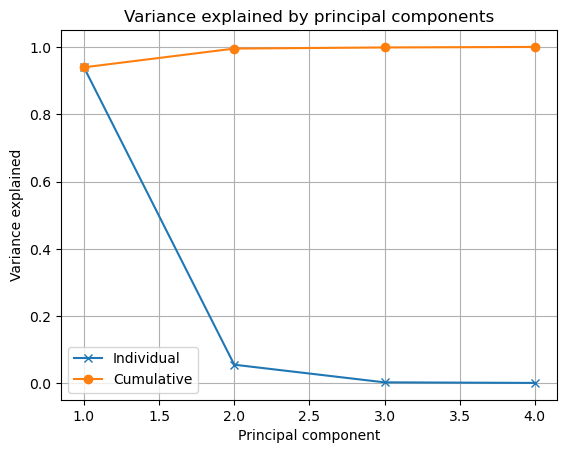

In [3]:
## Q4
# S: sigma, not squared
# S = np.array([49.8364,3.2358,2.9631,2.0575])
S = np.array([49.8364,12.1375,2.9631,2.0575])

# rho: variance explained by each PC
rho = (S*S) / (S*S).sum()
print(f'rho:\t {rho}')

# cumulative sum
cumsum = np.cumsum(rho)
print(f'cumsum:\t {cumsum}')

print(1-rho[1])

plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [4]:
## Q4, orthogonal PC
v1 = np.array([0.5133,0.5109,0.4915,0.4938])
v3 = np.array([0.4679,-0.8066,0.3611,-0.0116])
v4 = np.array([-0.7071,-0.2036,0.4769,0.4808])

# Test for orthogonal
v2 = np.array([0.8180,-0.2276,-0.5273,-0.0336])
print(v2 @ v1)
print(v2 @ v3)
print(v2 @ v4)

v2 = np.array([-0.1327,0.2168,0.6330,-0.7312])
print(v2 @ v1)
print(v2 @ v3)
print(v2 @ v4)

0.027838929999999984
0.37630609
-0.7996926899999999
-0.007298849999999982
9.701000000000848e-05
8.430000000003712e-06


In [1]:
## Q5, decision tree, class error
N = 204+166+197+94

n1 = 204+21+107+80    # left branch, x1<3.4
n2 = N-n1             # right branch
n1_n = n1/N
n2_n = n2/N

I_parent = 1 - 204/N
I_left = 1 - 204/n1
I_right = 1 - (166-21)/n2

pg1 = I_parent - n1_n*I_left - n2_n*I_right
pg1

0.21936459909228442

In [5]:
n1 = 204+31+128+84    # left branch, x1<3.5
n2 = N-n1             # right branch
n1_n = n1/N
n2_n = n2/N

I_parent = 1 - 204/N
I_left = 1 - 204/n1
I_right = 1 - (166-31)/n2

pg2 = I_parent - n1_n*I_left - n2_n*I_right
pg2

0.2042360060514372

In [7]:
pg1-pg2

0.01512859304084721

In [10]:
## Q9, naive bayes classifier
p_C1 = 0.63+0.05+0.2+0.48   # should divide by 2?
p_C2 = 0.15+0.17+0.11+0.21

numerator = 0.63 * 0.2 * p_C1
denom = numerator + 0.17 * 0.11 * p_C2
prob = numerator/denom
prob

0.9347181008902077

In [11]:
## Q11
c1_a1_mu = np.array([-0.78,-0.32,-0.69,0.7]).mean()
c1_a2_mu = np.array([-0.9,-0.22,-0.47,0.44]).mean()
c2_a1_mu = np.array([1.61,1.15,1.9,2.04]).mean()
c2_a2_mu = np.array([1.06,0.72,1.75,2.06]).mean()

c1 = np.array([c1_a1_mu,c1_a2_mu])
c2 = np.array([c2_a1_mu,c2_a2_mu])
x = np.array([0.7,0.6])

# Euclidean distance
print(np.linalg.norm(x-c1))
print(np.linalg.norm(x-c2))

1.3165912425654365
1.2596155167351664


In [12]:
## Q12, cv, cross validation, number of models to train
K_inner = 5
K_outer = 6
M = 6+5

n = (K_inner*M+2)*K_outer
n

342

In [13]:
## Q14, bayes theorem, remember include prior probability
p_C1 = 0
p_C2 = (104-52)/104
p_C3 = (112-28)/112
n4 = 400-124-104-112
p_C4 = (n4-12)/n4

prob = p_C2*104/(p_C1*124+p_C2*104+p_C3*112+p_C4*n4)
prob

0.2826086956521739

In [16]:
## Q15, error, accuracy
N = 7+45+6+142
e_LR = (6+45)/N
e_DT = (22+36)/N
print(e_LR, e_DT)

0.255 0.29


In [45]:
## Q17, regularized linear regression

###### 1st Outer Fold #######
X_train = np.array([3,4,3,7,5,2])
y_train = np.array([10,7,10,9,4,1])

# Standardize
std = np.std(X_train, ddof = 1)
mu = np.mean(X_train)
X_train = (X_train-mu)/std

# Add offset
X_train = X_train.reshape(-1,1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),1)

# Precompute terms
Xty = X_train.T @ y_train
XtX = X_train.T @ X_train
lambdaI = np.eye(2)*10
lambdaI[0,0] = 0 # remove bias regularization

# Solve for weights
w = np.linalg.solve(XtX+lambdaI,Xty)
w

array([6.83333333, 0.3354102 ])

In [46]:
###### 2nd Outer Fold #######
X_train = np.array([6,8,4,3,4,10])
y_train = np.array([7,6,4,3,5,5])

# Standardize
std = np.std(X_train, ddof = 1)
mu = np.mean(X_train)
X_train = (X_train-mu)/std

# Add offset
X_train = X_train.reshape(-1,1)
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),1)

# Precompute terms
Xty = X_train.T @ y_train
XtX = X_train.T @ X_train
lambdaI = np.eye(2)*0.1
lambdaI[0,0] = 0 # remove bias regularization

# Solve for weights
w = np.linalg.solve(XtX+lambdaI,Xty)
w

array([5.        , 0.72242757])

In [48]:
def draw_ROC_curve(y_hat,y_true):
    """
    Input: y_true values estimated from a 1-dimension observation,
           y_hat values based on class membership
    Output: Jaccard similarity and Rand index.
    """
    
    import matplotlib.pyplot as plt
    
    if len(y_hat)!=len(y_true):
        raise ValueError("y_hat and y_true have different array lengths")
        
    n = len(y_hat)
    n_positive = y_true.count(1)
    n_negative = y_true.count(0)
    print(f'n_positive: {n_positive}, n_negative: {n_negative}')
    
    TPR = [1]
    FPR = [1]
    for i in range(n):
        TP = 0
        FP = 0
        threshold = y_hat[i]
        for j in range(n):
            if y_hat[j] > threshold and y_true[j]==0:
                FP+=1
            if y_hat[j] > threshold and y_true[j]==1:
                TP+=1
        TPR.append(TP/n_positive)
        FPR.append(FP/n_negative)
        
    plt.plot(FPR,TPR)
    plt.grid()
    plt.axis('square')
    plt.show()

n_positive: 3, n_negative: 4


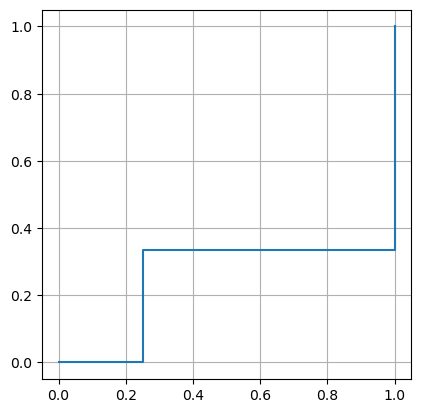

In [50]:
## Q18
y_hat = np.linspace(0,0.8,7)

# Prediction A
y_true = [1,1,0,0,0,1,0]
draw_ROC_curve(y_hat,y_true)

In [73]:
## Q21, linear regression, feature transformation
y_true = np.array([4,7,0,3,1]).reshape(-1,1)
X = np.array([1,4,2,7,3,2,4,9,5,0]).reshape(-1,2)

x1x2 = np.array([4,14,6,4*9,0]).reshape(-1,1)
X = np.concatenate((X,x1x2),1)

w0 = 1
w = np.array([-10,4,2]).reshape(-1,1)

y_hat = w0 + X @ w
temp = 1/5*(abs(y_true-y_hat).sum())
E = 37.6
l = (E - temp)/np.linalg.norm(w, ord=np.inf)
l

0.43999999999999984

In [75]:
## Q22, ANN output
def sigmoid(xw):
    output = 1 / (1 + np.exp(-xw))
    return output

def reLu(xw):
    output = (xw > 0) * xw
    return output

def tanh(xw):
    output = np.tanh(xw)
    return output

w0 = 1.4
w1 = np.array([0,0.3,0.6])
w2 = np.array([1.2,0.4,1.9])
w_list = np.array([w1, w2])
w_out = np.array([-2.4,2.6])

# INPUT LAYER, choose a random point for comparison, add 1 in front
x = np.array([1,0,0])

# HIDDEN LAYER
z = []   # output of hidden units
for weight in w_list:
    xw = x @ weight
    z.append(sigmoid(xw))

# OUTPUT LAYER
f = reLu(np.sum(w_out * z) + w0)
f

2.1981644370974456

In [83]:
## Q23, multivariate normal distribution
from scipy.stats import multivariate_normal

mu_C1 = np.array([0,1])
mu_C2 = np.array([2.15,7.55])
mu_C3 = np.array([0,4.6])
sigma_C1 = np.array([[10,0],[0,0.208]])
sigma_C2 = np.array([[2.51,-1.1],[-1.1,0.6]])
sigma_C3 = np.array([[1.372,0],[0,1.372]])
w1 = 0.2
w2 = 0.4
w3 = 0.4

x = [[0.0,2.0],[1,7],[-1,9],[4.5,1]]
for obs in x:
    pC1 = w1*multivariate_normal.pdf(obs, mu_C1, sigma_C1)
    pC2 = w2*multivariate_normal.pdf(obs, mu_C2, sigma_C2)
    pC3 = w3*multivariate_normal.pdf(obs, mu_C3, sigma_C3)
    p = np.array([pC1,pC2,pC3])
    print(np.argmax(p)+1) # class assigned

3
3
2
1
